<a href="https://colab.research.google.com/github/Unstopable18/Deep-Learning/blob/main/Cats_vs_Dogs%20(Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:07<00:00, 167MB/s]
100% 1.06G/1.06G [00:07<00:00, 159MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import  Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256)
)

test=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256)
)

Found 5000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalize the above numpy array into (0-1)

In [6]:
def process(image,label):
    image=tf.cast(image/256.,tf.float32)
    return image,label
train=train.map(process)
test=test.map(process)

CNN Model

In [7]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(train,epochs=10,validation_data=test)

Epoch 1/10
157/157 [==============================] - 35s 135ms/step - loss: 0.6955 - accuracy: 0.5466 - val_loss: 0.6810 - val_accuracy: 0.5484
Epoch 2/10
157/157 [==============================] - 21s 129ms/step - loss: 0.6240 - accuracy: 0.6536 - val_loss: 0.5529 - val_accuracy: 0.7230
Epoch 3/10
157/157 [==============================] - 22s 136ms/step - loss: 0.5337 - accuracy: 0.7364 - val_loss: 0.4589 - val_accuracy: 0.7748
Epoch 4/10
157/157 [==============================] - 19s 117ms/step - loss: 0.4383 - accuracy: 0.7940 - val_loss: 0.3625 - val_accuracy: 0.8366
Epoch 5/10
157/157 [==============================] - 20s 124ms/step - loss: 0.3208 - accuracy: 0.8612 - val_loss: 0.2455 - val_accuracy: 0.8922
Epoch 6/10
157/157 [==============================] - 22s 137ms/step - loss: 0.2075 - accuracy: 0.9120 - val_loss: 0.1544 - val_accuracy: 0.9394
Epoch 7/10
157/157 [==============================] - 22s 136ms/step - loss: 0.1148 - accuracy: 0.9556 - val_loss: 0.1433 - val_ac

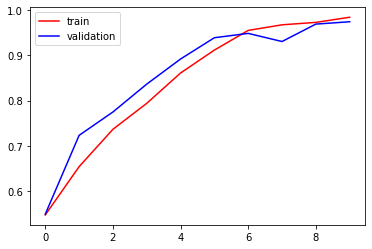

In [10]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

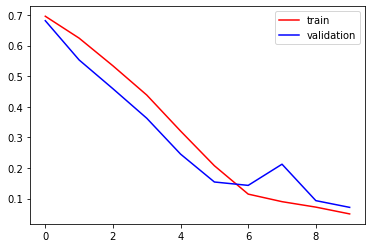

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(train,epochs=10,validation_data=test)

Epoch 1/10
157/157 [==============================] - 28s 158ms/step - loss: 2.4350 - accuracy: 0.5634 - val_loss: 1.6423 - val_accuracy: 0.5166
Epoch 2/10
157/157 [==============================] - 25s 156ms/step - loss: 0.7500 - accuracy: 0.5986 - val_loss: 0.6906 - val_accuracy: 0.5650
Epoch 3/10
157/157 [==============================] - 23s 145ms/step - loss: 0.6132 - accuracy: 0.6712 - val_loss: 0.6758 - val_accuracy: 0.6108
Epoch 4/10
157/157 [==============================] - 23s 147ms/step - loss: 0.5655 - accuracy: 0.7088 - val_loss: 0.5478 - val_accuracy: 0.7218
Epoch 5/10
157/157 [==============================] - 25s 156ms/step - loss: 0.5173 - accuracy: 0.7466 - val_loss: 0.4768 - val_accuracy: 0.7820
Epoch 6/10
157/157 [==============================] - 24s 150ms/step - loss: 0.4665 - accuracy: 0.7748 - val_loss: 0.4107 - val_accuracy: 0.8286
Epoch 7/10
157/157 [==============================] - 25s 157ms/step - loss: 0.4091 - accuracy: 0.8136 - val_loss: 0.4521 - val_ac

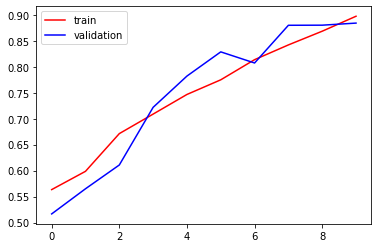

In [15]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

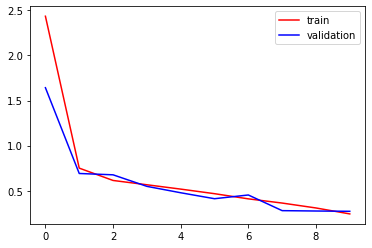

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(train,epochs=10,validation_data=test)

Epoch 1/10
157/157 [==============================] - 21s 121ms/step - loss: 0.7035 - accuracy: 0.5624 - val_loss: 0.6848 - val_accuracy: 0.5504
Epoch 2/10
157/157 [==============================] - 22s 141ms/step - loss: 0.6408 - accuracy: 0.6320 - val_loss: 0.5754 - val_accuracy: 0.6898
Epoch 3/10
157/157 [==============================] - 19s 119ms/step - loss: 0.5701 - accuracy: 0.7154 - val_loss: 0.4925 - val_accuracy: 0.7774
Epoch 4/10
157/157 [==============================] - 22s 135ms/step - loss: 0.4860 - accuracy: 0.7696 - val_loss: 0.3871 - val_accuracy: 0.8298
Epoch 5/10
157/157 [==============================] - 20s 126ms/step - loss: 0.3758 - accuracy: 0.8308 - val_loss: 0.2670 - val_accuracy: 0.8932
Epoch 6/10
157/157 [==============================] - 22s 139ms/step - loss: 0.2869 - accuracy: 0.8766 - val_loss: 0.2220 - val_accuracy: 0.9130
Epoch 7/10
157/157 [==============================] - 20s 125ms/step - loss: 0.1846 - accuracy: 0.9268 - val_loss: 0.1349 - val_ac

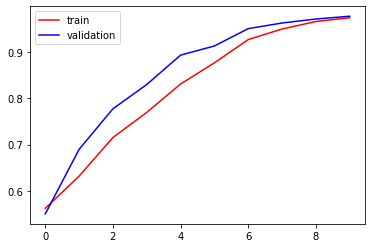

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

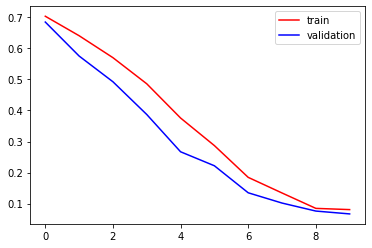

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## Testing 

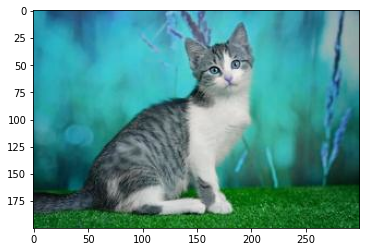

In [23]:
#test_img = cv2.imread('/content/dog.jpg')
test_img = cv2.imread('/content/cat.jpg')
plt.imshow(test_img)

In [24]:
test_img.shape

(200, 300, 3)

In [25]:
test_img = cv2.resize(test_img,(256,256))

In [26]:
test_input = test_img.reshape((1,256,256,3))

In [27]:
model.predict(test_input)

1/1 [==============================] - 0s 267ms/step


array([[1.]], dtype=float32)

## Data Augumentation

In [28]:
dataGen=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,horizontal_flip=True,rotation_range=40,
                           width_shift_range=0.2,height_shift_range=0.2,
                          fill_mode='nearest')

In [30]:
i = 0
for batch in dataGen.flow(test_input, batch_size=1,
                          save_to_dir='aug', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break